In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from firestudio.studios.gas_studio import GasStudio
from abg_python.galaxy.gal_utils import Galaxy
from abg_python.all_utils import filterDictionary
import matplotlib.pyplot as plt
%matplotlib inline

don't have phil's colormaps


In [49]:
import os
import matplotlib

In [50]:
matplotlib.rcParams['figure.dpi'] = 150

In [5]:
snapdir = "/Users/agurvich/research/snaps/m12i_res7100/output/"
snapnum = 600 
galaxy = Galaxy(
    'm12i_res7100',
    '/projects/b1026/agurvich/snaps/metal_diffusion/m12i_res7100/output',
    600,
    datadir='/projects/b1026/agurvich/data/metal_diffusion')

Couldn't find a metadata file... for
 Metadata object at /projects/b1026/agurvich/data/metal_diffusion/m12i_res7100/metadata/meta_Galaxy_600.hdf5


In [6]:
galaxy.extractMainHalo()

Using the saved sub-snapshots
Successfully loaded a pre-extracted subsnap
Reorienting...
Done.
extract_halo_inner(m12i_res7100_md at 600,){'orient_stars': True} 17.35 s elapsed
Snapshot memory free


(14.389217379832706,
 True,
 2.588189693003323,
 -2.7838931872964907,
 35229529293674.87,
 44642473906878.87,
 268.00569800569804,
 2.877843475966541)

In [18]:
disk_mask = np.ones(galaxy.sub_snap['Masses'].size)
xs,ys,zs = galaxy.sub_snap['Coordinates'].T

disk_mask = (np.abs(xs) < 20) & (np.abs(ys) < 20) & (np.abs(zs) < 20)

/home/abg6257/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/abg6257/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


/home/abg6257/.conda/envs/python3/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


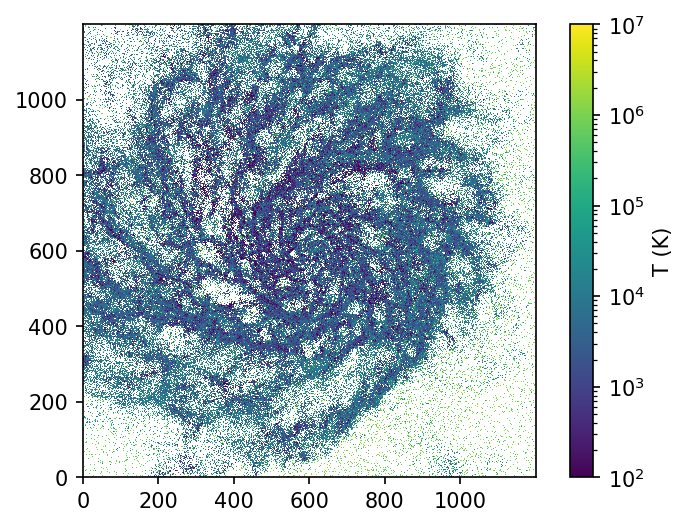

In [51]:
from matplotlib.colors import LogNorm
h_mt,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_snap['Masses'][disk_mask]*galaxy.sub_snap['Temperature'][disk_mask])

h_m,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_snap['Masses'][disk_mask])

plt.imshow((h_mt/h_m).T,norm=LogNorm(vmin=100,vmax=1e7),origin='lower')
plt.gca().set_aspect(1)
plt.colorbar(label='T (K)')

In [55]:
studio_datadir = os.path.join(os.path.dirname(galaxy.datadir),'firestudio')
print(studio_datadir)
my_gasStudio = GasStudio(
    studio_datadir,
    galaxy.snapnum,
    galaxy.datadir_name,
    gas_snapdict=galaxy.sub_snap,
    star_snapdict=galaxy.sub_star_snap,
    )

/projects/b1026/agurvich/data/metal_diffusion/firestudio
setting use_colorbar to default value of: False
setting cbar_label to default value of: 
setting cbar_logspace to default value of: True
setting snapnum to user value of: 600
setting sim_name to user value of: m12i_res7100
setting frame_half_width to default value of: 15
setting frame_half_thickness to default value of: 15
setting frame_center to default value of: [0. 0. 0.]
setting theta to default value of: 0
setting phi to default value of: 0
setting psi to default value of: 0
setting aspect_ratio to default value of: 1
setting pixels to default value of: 1200
setting figure_label to default value of: 
setting scale_bar to default value of: True
setting scale_line_length to default value of: 5
setting noaxis to default value of: True
setting savefig to default value of: None
setting fontsize to default value of: 12
setting snapdir to default value of: None


cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  2
max_Temperature =  7
Image range (Temperature):  2.9147222 6.6890903
Image range (8bit):  46.650833 239.1436


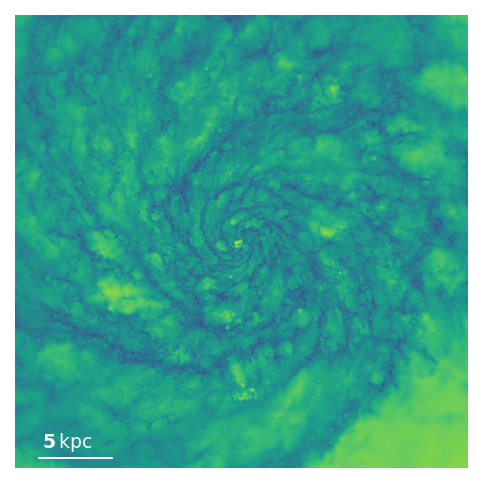

In [56]:
pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=2,
    max_quantity=7,
    quantity_adjustment_function=np.log10)

setting use_colorbar to user value of: True
setting cbar_label to user value of: T (K)
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  2
max_Temperature =  7
Image range (Temperature):  2.9147222 6.6890903
Image range (8bit):  46.650833 239.1436


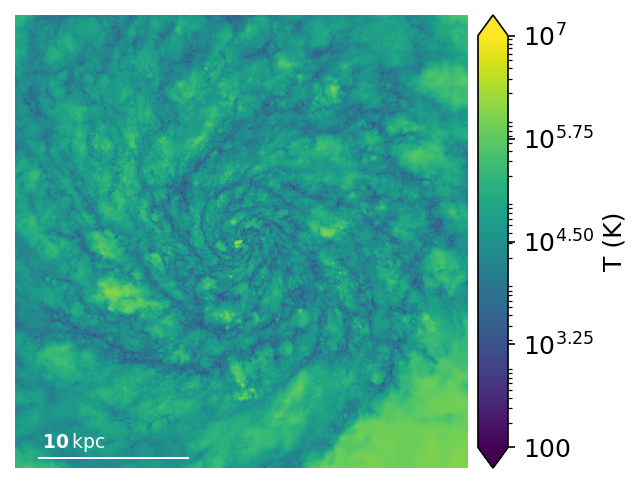

In [54]:
my_gasStudio.set_ImageParams(
    use_colorbar=True,
    cbar_label='T (K)')

pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=2,
    max_quantity=7,
    quantity_adjustment_function=np.log10)

setting use_colorbar to user value of: True
setting cbar_label to user value of: T (K)
setting scale_line_length to user value of: 10
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Temperature =  3
max_Temperature =  6.5
Image range (Temperature):  2.9147222 6.6890903
Image range (8bit):  0.0 255.0


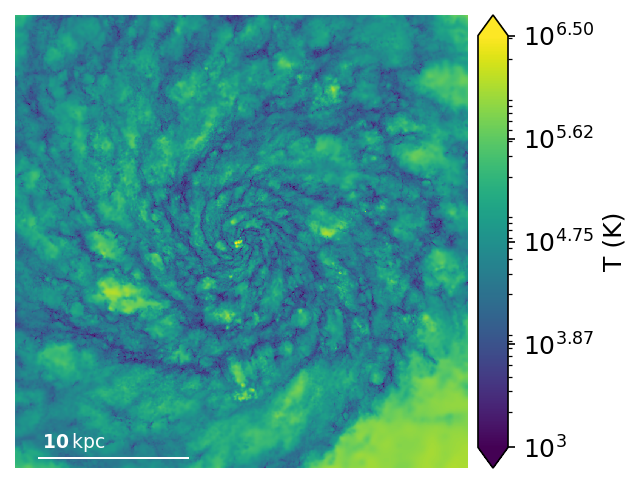

In [57]:
my_gasStudio.set_ImageParams(
    use_colorbar=True,
    cbar_label='T (K)',
    scale_line_length=10)

pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
    min_quantity=3,
    max_quantity=6.5,
    quantity_adjustment_function=np.log10)

In [ ]:
galaxy.render(plt.gca(),)

setting use_colorbar to user value of: True
setting cbar_label to user value of: $\Sigma_g$ (Msun/pc^2)
setting cbar_logspace to user value of: True
setting scale_line_length to user value of: 10
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'Temperature'){} success!
min_Masses =  -0.5
max_Masses =  1.8
Image range (Masses):  -0.96518946 3.0965042
Image range (8bit):  0.0 255.0


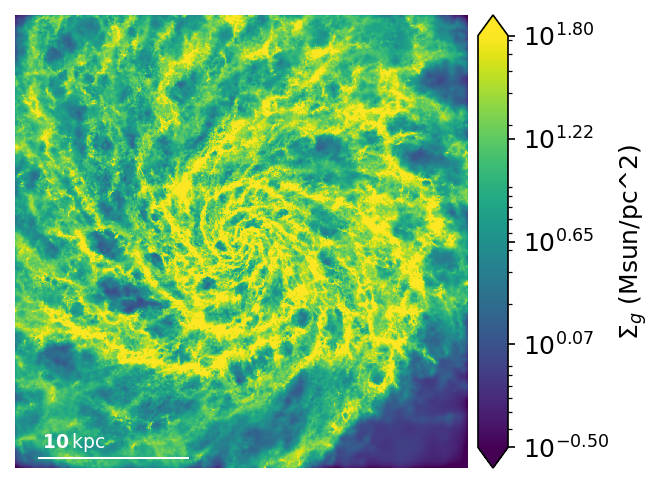

In [120]:
my_gasStudio.set_ImageParams(
    use_colorbar=True,
    cbar_label='$\Sigma_g$ (Msun/pc^2)',
    scale_line_length=10,
    cbar_logspace=True)

pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='Temperature',
#    min_quantity=3,
#    max_quantity=6.5,
    quantity_adjustment_function=np.log10,    
    min_weight=-0.5,
    max_weight=1.8,
    weight_adjustment_function=lambda x: np.log10(x/my_gasStudio.Acell) + 10 - 6) ## msun/pc^2

## Try computing a quantity and sending it in

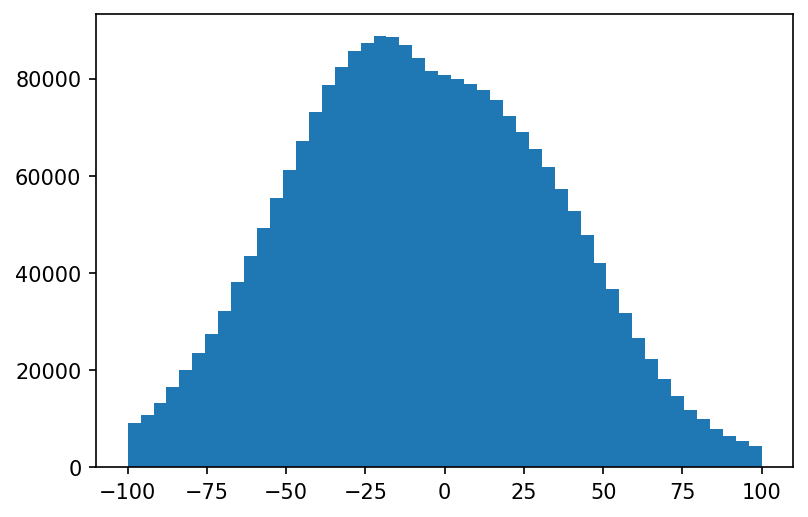

In [122]:
rhats = galaxy.sub_snap['Coordinates']/np.linalg.norm(galaxy.sub_snap['Coordinates'],axis=1)[:,None]
vrs = np.sum(rhats*galaxy.sub_snap['Velocities'],axis=1)
plt.hist(vrs[disk_mask],bins=np.linspace(-100,100,50))
print()

In [121]:
my_gasStudio.print_ImageParams()
my_gasStudio.set_ImageParams(
    cbar_label='$v_r$ (km s$^{-1}$)',
    cbar_logspace=False)

use_colorbar = True
cbar_label = $\Sigma_g$ (Msun/pc^2)
cbar_logspace = True
frame_half_width = 15
frame_half_thickness = 15
frame_center = [0. 0. 0.]
theta = 0
phi = 0
psi = 0
aspect_ratio = 1
pixels = 1200
figure_label = 
scale_bar = True
noaxis = True
savefig = None
fontsize = 12
snapdir = None
snapnum = 600
setting cbar_label to user value of: $v_r$ (km s$^{-1}$)
setting cbar_logspace to user value of: False


cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', array([-384.33051978, -386.96857224,  -60.82537647, ..., -141.17711374,
       -115.19238708, -101.03451318]), 'vr'){} success!
min_vr =  -100
max_vr =  100
Image range (vr):  -154.47911 159.90714
Image range (8bit):  0.0 255.0


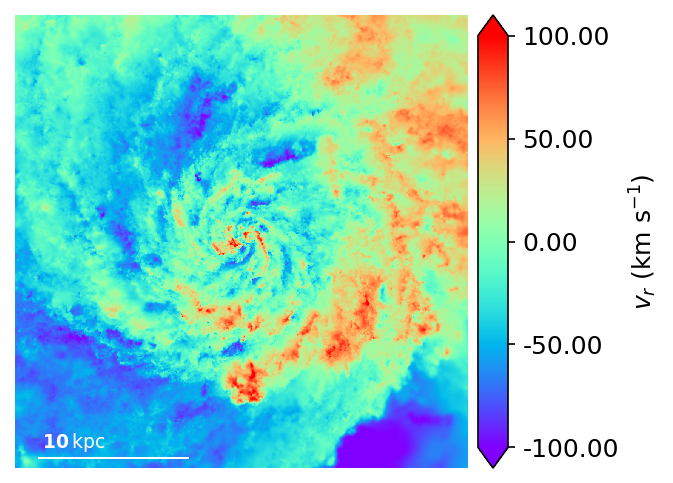

In [123]:
import time
init = time.time()
pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='vr',
    quantities=vrs,
    min_quantity =-100,
    max_quantity= 100,
    cmap='rainbow')

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', array([-384.33051978, -386.96857224,  -60.82537647, ..., -141.17711374,
       -115.19238708, -101.03451318]), 'vr'){} success!
min_Masses =  -0.5
max_Masses =  1.8
Image range (Masses):  -0.96518946 3.0965042
Image range (8bit):  0.0 255.0
min_vr =  -150
max_vr =  150
Image range (vr):  -154.47911 159.90714
Image range (8bit):  0.0 255.0
TODO:Need to create a 2-axis colorbar.


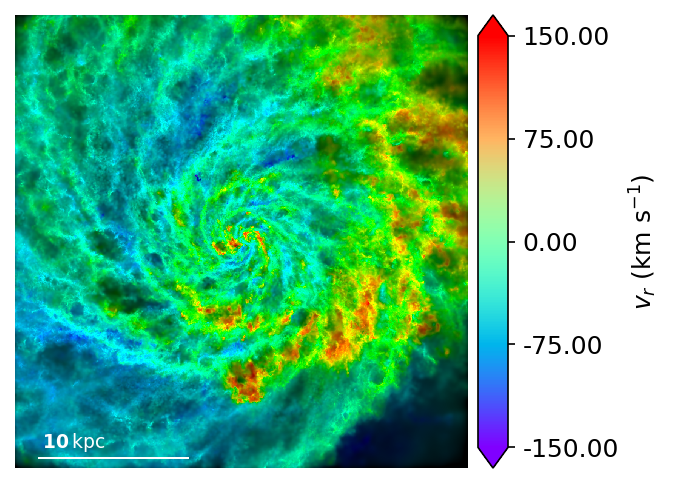

In [117]:
pixels = my_gasStudio.render(
    weight_name='Masses',
    quantity_name='vr',
    quantities=vrs,
    min_quantity =-150,
    max_quantity= 150,
    cmap='rainbow',
    min_weight=-0.5,
    max_weight=1.8,
    weight_adjustment_function=lambda x: np.log10(x/my_gasStudio.Acell) + 10 - 6) ## msun/pc^2
plt.gcf().set_facecolor('white')